In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = '/Users/leona/OneDrive/Documentos/GitHub/machine-learning-studies/classification/column_2C_weka (1).csv'
df = pd.read_csv(data)

In [14]:
print(df.head(), df.isna().sum())

df['class'] = df['class'].replace('Abnormal', 1)
df['class'] = df['class'].replace('Normal', 0)

   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027817            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal   pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
cla

C:\Users\leona\AppData\Local\Temp\ipykernel_42264\338785841.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace('Normal', 0)


In [15]:
x = df.drop(columns='class', axis=1)
y = df['class']

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)

In [18]:
min_samples_split = np.array([2, 3, 4, 5, 6, 7, 8, 9])
max_depth = np.array([1, 2, 3, 4, 5, 6])
criterion = ["gini", "entropy", "log_loss"]
param_grid = {
    'min_samples_split': min_samples_split,
    'max_depth': max_depth,
    'criterion': criterion
}

In [19]:
model = DecisionTreeClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid.fit(x, y)

print(f'The best score of this model was: {grid.best_score_}. The best parameters was: {grid.best_params_}')

The best score of this model was: 0.7774193548387096. The best parameters was: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 9}


In [20]:
best_model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=9)
best_model.fit(x_train, y_train)

prediction = best_model.predict(x_test)
matrix = confusion_matrix(y_test, prediction)

print(f'The confusion matrix of this model was: \n{matrix}')

The confusion matrix of this model was: 
[[22  6]
 [10 55]]


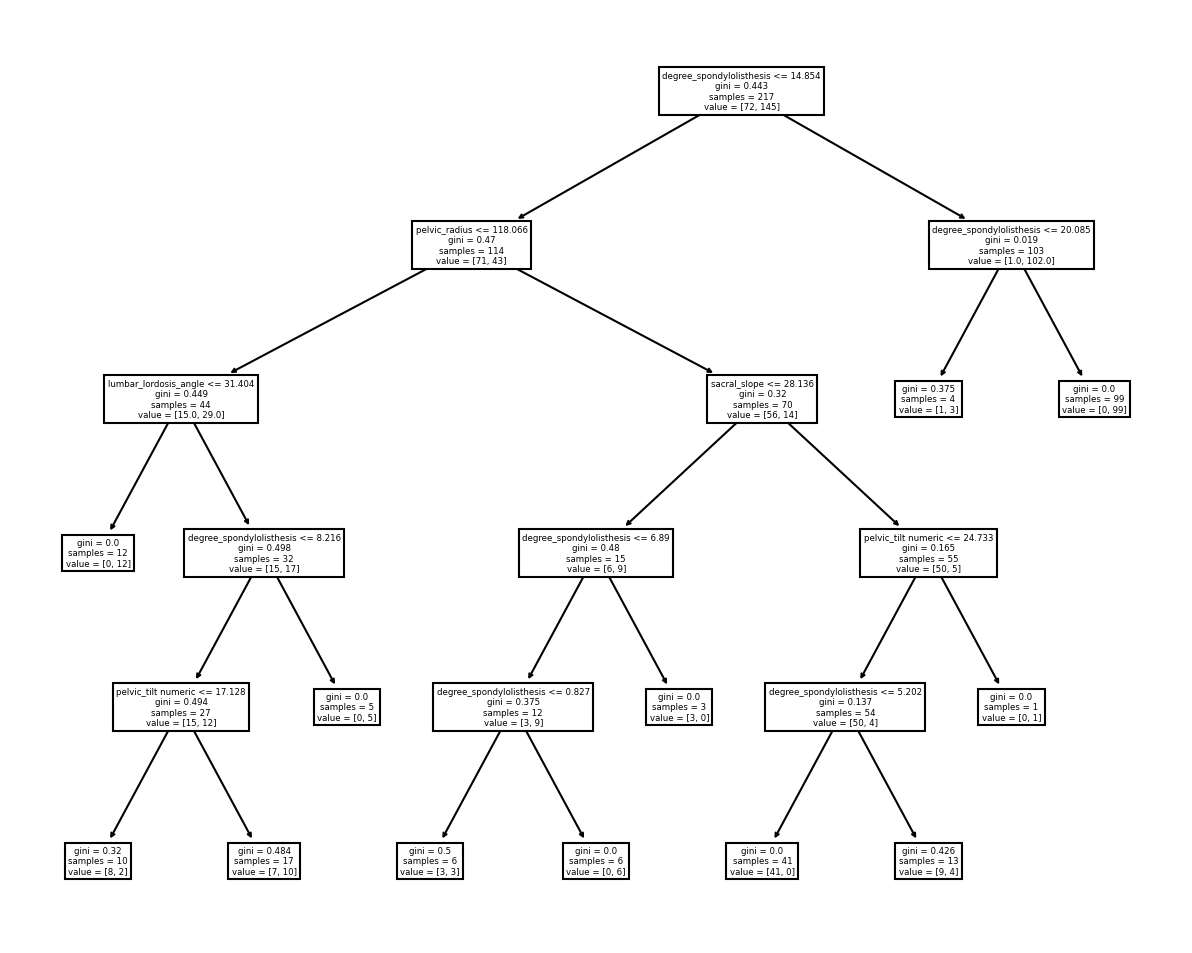

In [21]:
plt.figure(figsize=(10, 8), dpi=150)
plot_tree(best_model, feature_names=x.columns)
plt.show()